# Simle Linear Regression 

liner Regression module to predict the Seals

## Step 1 Reading and Understanding the data

In [109]:
#Importing th requred labraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [8]:
# Read the file

Adverstising = pd.read_csv("E:/IIIT B/Linear Regression/Simple Regression/advertising.csv")
Adverstising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
Adverstising.shape

(200, 4)

In [11]:
Adverstising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
Adverstising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualization of data


<Axes: xlabel='TV', ylabel='Sales'>

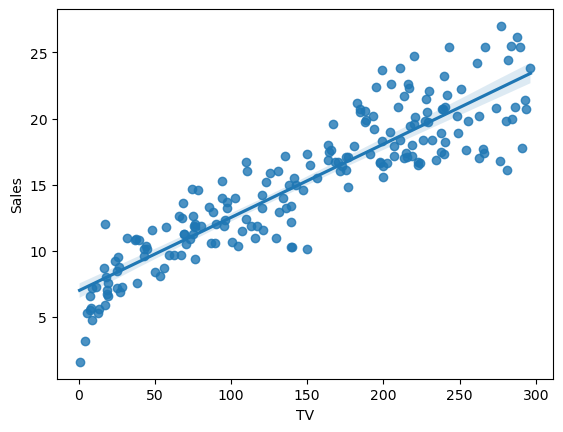

In [29]:
sns.regplot(x="TV", y="Sales", data=Adverstising)

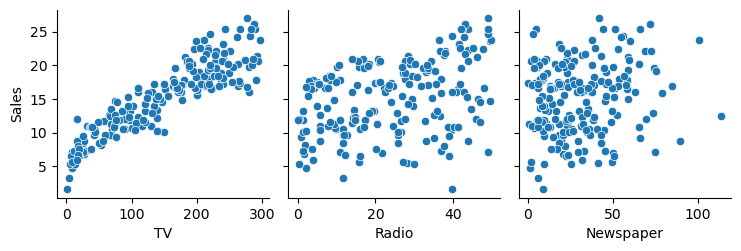

In [28]:
sns.pairplot(data=Adverstising,
            x_vars=["TV","Radio","Newspaper"],
            y_vars="Sales")

In [32]:
Adverstising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

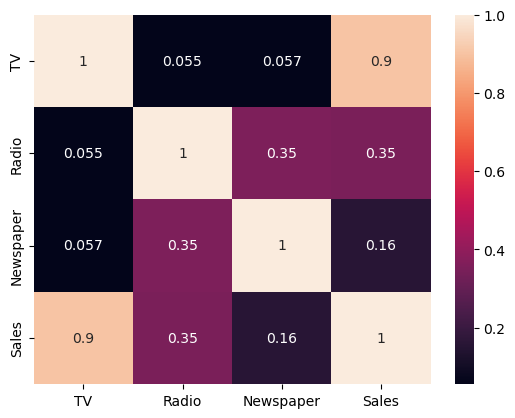

In [33]:
sns.heatmap(Adverstising.corr(),annot=True)

## Step 2 Bulid a Simple Liner Regression Model

### Steps to bulid the simple regression module:
1. Create x and y
2. Create train and test sets(70-30, 80-20)
3. Train the model on training sets (Learn the coefficents)
4. Evaluate the Model (train and test sets)

In [37]:
# create x and y
X= Adverstising["TV"]
y=Adverstising["Sales"]

In [44]:
# Train-test split
X_train, X_test, y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=100)


In [45]:
X_train.head(5)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [47]:
# Training the model

X_train_sm=sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [53]:
# Fitting a Model or training the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [54]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.52e-52
Time:                        15:44:31   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_train_pred=lr_model.predict(X_train_sm)

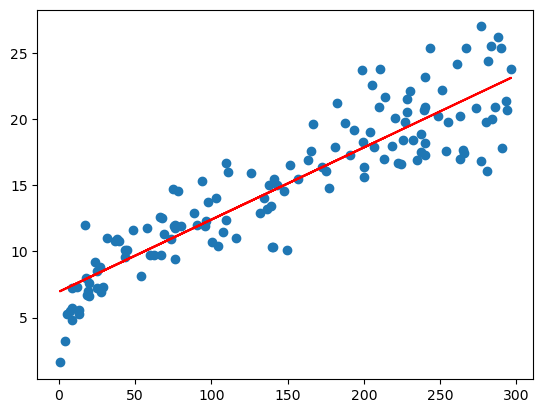

In [68]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred,"r")

## Step 3 Residual Analysis

In [72]:
#erroe

res=y_train - y_train_pred
res.head(5)

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

C:\Users\suraz\AppData\Local\Temp\ipykernel_15708\2752741755.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'residule Plot')

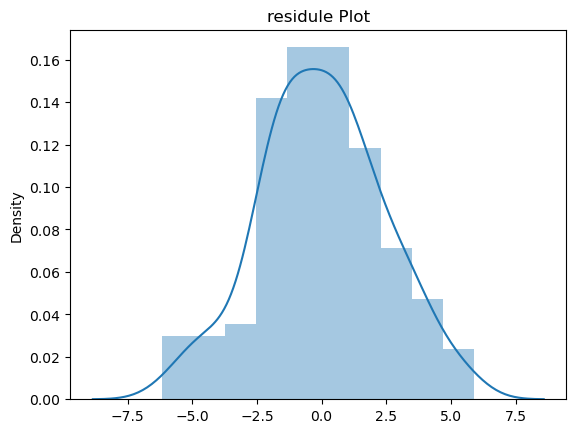

In [78]:
#plot the residule
plt.figure()
sns.distplot(res)
plt.title("residule Plot")


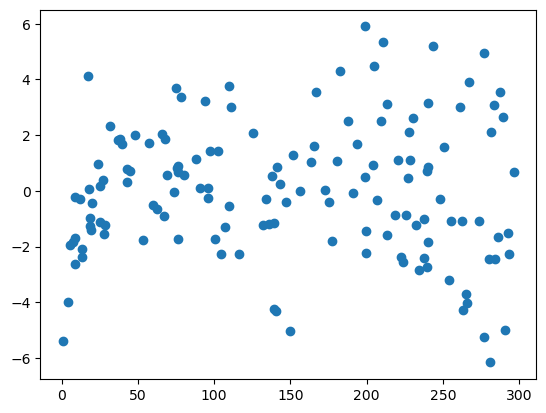

In [81]:
# Look for pattern for Residule (Should not be able to identify any pattern)
plt.scatter(X_train,res)


## Step 4 Preduction and Evaluation on test side

In [82]:
# make the preduction on the test set (y_test_pred)
# Evaluate the model, R-square, on the test

In [100]:
# adding a constant to predict the y
X_test_sm=sm.add_constant(X_test)

In [101]:
y_test_pred=lr_model.predict(X_test_sm)

In [102]:
#R-square

r2=r2_score(y_true=y_test, y_pred= y_test_pred)
r2

0.7921031601245659

In [103]:
#mean squared error
mean_squared_error(y_true=y_test, y_pred= y_test_pred)

4.077556371826953

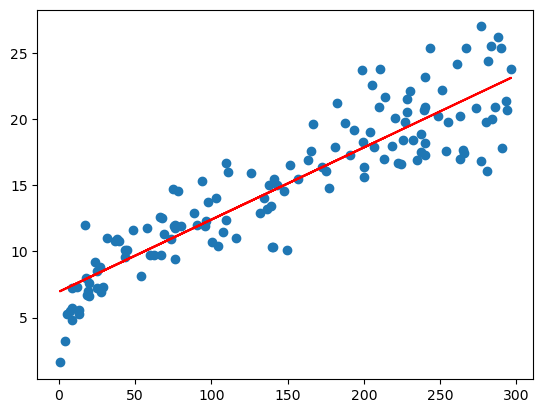

In [104]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred,"r")

# Simple Linear Regression using Sklearning 

In [107]:
# Train-test split
X_train, X_test, y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=100)


In [117]:
X_train
X_train.shape

(140,)

In [119]:
#reshaping the X train to (140,1)
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)


### steaps in Sklern model building

1. create an object of linear regression
2. fit the model
3. see the params, make predictions (train and test)
4. Evaluate R2 and all....


In [110]:
#create an object of linear regression
lm=LinearRegression()

In [121]:
#fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [127]:
#see the params, make predictions (train and test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [129]:
# make predictions
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)


In [131]:
# Evaluate the model
print(r2_score(y_true=y_train, y_pred= y_train_pred))
r2=r2_score(y_true=y_test, y_pred= y_test_pred)
r2

0.8157933136480389


0.7921031601245662